# EDA users

El dataset de users contiene informacion del estado del cliente a la hora de pedir un prestamo.

Analizaremos a continuación:
* Distancia entre prestamos:
    * ¿Hay clientes de deuda mas habituales? Hay tipo de clientes eventuales? 
    * ¿Hay alguna correlacion entre frecuencia de prestamos y morosidad? 
* Navegacion.
    *   Distribucion de la navegacion
        * Navegacion segun morosidad (dos histogramas)
    * Los clientes que navegan mas pagan mas? Histograma por bins de navegacion
  

| users | target                 | Variable to indicate a non performing loan (Non-paid order or Order paid after 15 days post due date)  |   |   |
|:-----:|------------------------|--------------------------------------------------------------------------------------------------------|---|---|
| users | customer_id            | identification number per buyer                                                                        |   |   |
| users | order_number           | identification number per transaction (acording with logistics)                                        |   |   |
| users | city                   | city where order was located (BOG: Bogota, BAQ: Barranquilla, MDE: Medellin )                          |   |   |
| users | origination_amt        | aoriginated amount for the order                                                                       |   |   |
| users | segment                | user segment                                                                                           |   |   |
| users | microsegment           | user sub segment                                                                                       |   |   |
| users | close_date             | date when the order was delivered                                                                      |   |   |
| users | due_date               | due date of the loan                                                                                   |   |   |
| users | payment_date           | date of the payment                                                                                    |   |   |
| users | order_closed_cohort    | cohort to corresponds the order according to close date                                                |   |   |
| users | ord_due_cohort         | cohort to corresponds the order according to due date                                                  |   |   |
| users | payment_cohort         | cohort to corresponds the order according to payment date                                              |   |   |
| users | dif_pymt_date          | difference in days between payment date and due date                                                   |   |   |
| users | dow_closed             | day of week when the order was closed                                                                  |   |   |
| users | frucap_order_rank      | order rank in terms of all their orders with credit frubana                                            |   |   |
| users | paid_flag              | flag to indicate if the loan was paid                                                                  |   |   |
| users | count_sessions         | number of initiated session in the app in the las 60 days                                              |   |   |
| users | avg_navi_time_60d_secs | average navigation time (in Seconds) of sessions in the last 3 months according to name in the file    |   |   |
| users | last_navi_date_days    | days between the order an the last session in the app                                                  |   |   |

# 1) Target: ventana temporal de chequeo

##### El problema que tenemos es que cada usuario que puede llegar a tener un credito lo tiene en diferentes momentos en comparación a los demas. Sin embargo, no es la misma ventana de transaccionalibilidad para todos.

In [42]:
import pandas as pd
path_data = "/Users/lolonastri/Desktop/POO_UCEMA/machine_learning/7-clasificacion/03_dataset_completos/users.csv"
# Cargar los DataFrames de usuarios y transacciones
users_df = pd.read_csv(path_data)

In [43]:
users_df

,Unnamed: 0,target,id_cliente,orden_nro,ciudad,monto,segmento,microsegmento,fecha_orden,fecha_de_vencimiento,fecha_de_pago,order_closed_cohort,ord_due_cohort,payment_cohort,dif_pymt_date,dow_closed,cantidad_sesiones,tiempo_promedio_navegacion,days_ultima_navegacion
0,0,0,-254861,71455943905963,BOG,277133.55,restaurante,cafetería,2022-10-06,2022-10-13,2022-10-12,2022-10-01,2022-10-01,2022-10-01,-1.0,3,21,614.333333,1.0
1,1,0,-254861,52135310417582,BOG,299324.79,restaurante,cafetería,2022-11-16,2022-11-23,2022-12-01,2022-11-01,2022-11-01,2022-12-01,8.0,2,23,642.130435,1.0
2,2,0,-254861,54309973913593,BOG,292811.25,restaurante,cafetería,2022-12-03,2022-12-10,2022-12-13,2022-12-01,2022-12-01,2022-12-01,3.0,5,22,558.909091,1.0
3,3,1,-254861,118482691333265,BOG,277073.57,restaurante,cafetería,2022-12-17,2022-12-24,2023-01-13,2022-12-01,2022-12-01,2023-01-01,20.0,5,29,469.034483,0.0
4,4,0,-254861,25274666404925,BOG,297466.49,restaurante,cafetería,2023-01-18,2023-01-25,2023-01-27,2023-01-01,2023-01-01,2023-01-01,2.0,2,53,294.113208,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21210,21210,0,344898467,28264894727027,BAQ,199670.00,comercio,na,2023-09-04,2023-09-11,2023-09-11,2023-09-01,2023-09-01,2023-09-01,0.0,0,9,736.000000,1.0
21211,21211,0,344898467,27469118079885,BAQ,271131.62,comercio,na,2023-09-13,2023-09-20,2023-09-21,2023-09-01,2023-09-01,2023-09-01,1.0,2,24,582.125000,1.0
21212,21212,0,344908985,7179198112904,BOG,254999.84,restaurante,panadería/pastelería,2023-09-01,2023-09-08,2023-09-08,2023-09-01,2023-09-01,2023-09-01,0.0,4,57,727.473684,0.0
21213,21213,0,344908985,159284358034912,BOG,290161.07,restaurante,panadería/pastelería,2023-09-11,2023-09-18,2023-09-18,2023-09-01,2023-09-01,2023-09-01,0.0,0,66,592.363636,0.0


In [44]:
# users_df.head(2).T # lo traspongo para ver el dataset mas facil.

In [45]:
users_df[users_df.id_cliente == -254861][["fecha_orden","target"]]

,fecha_orden,target
0,2022-10-06,0
1,2022-11-16,0
2,2022-12-03,0
3,2022-12-17,1
4,2023-01-18,0


In [46]:
users_df.head(2)

,Unnamed: 0,target,id_cliente,orden_nro,ciudad,monto,segmento,microsegmento,fecha_orden,fecha_de_vencimiento,fecha_de_pago,order_closed_cohort,ord_due_cohort,payment_cohort,dif_pymt_date,dow_closed,cantidad_sesiones,tiempo_promedio_navegacion,days_ultima_navegacion
0,0,0,-254861,71455943905963,BOG,277133.55,restaurante,cafetería,2022-10-06,2022-10-13,2022-10-12,2022-10-01,2022-10-01,2022-10-01,-1.0,3,21,614.333333,1.0
1,1,0,-254861,52135310417582,BOG,299324.79,restaurante,cafetería,2022-11-16,2022-11-23,2022-12-01,2022-11-01,2022-11-01,2022-12-01,8.0,2,23,642.130435,1.0


In [47]:
users_df.segmento.value_counts(dropna=False)

segmento
restaurante    18375
hogar           1495
comercio        1068
duplicated       199
institución       72
fraud              5
na                 1
Name: count, dtype: int64

### Analisis

##### Tengo dos variables para analizar. El target y el segmento.

In [48]:
users_df["target"].value_counts()

target
0    17782
1     3433
Name: count, dtype: int64

In [49]:
users_df.groupby(["segmento"]).agg(cantidad=("target","sum"))

,cantidad
segmento,
comercio,186
duplicated,37
fraud,0
hogar,327
institución,11
na,0
restaurante,2872


In [50]:
users_df.groupby(["segmento"]).agg(cantidad=("target","mean"))

,cantidad
segmento,
comercio,0.174157
duplicated,0.185930
fraud,0.000000
hogar,0.218729
institución,0.152778
na,0.000000
restaurante,0.156299


In [51]:
list(users_df)

['Unnamed: 0',
 'target',
 'id_cliente',
 'orden_nro',
 'ciudad',
 'monto',
 'segmento',
 'microsegmento',
 'fecha_orden',
 'fecha_de_vencimiento',
 'fecha_de_pago',
 'order_closed_cohort',
 'ord_due_cohort',
 'payment_cohort',
 'dif_pymt_date',
 'dow_closed',
 'cantidad_sesiones',
 'tiempo_promedio_navegacion',
 'days_ultima_navegacion']

In [52]:
users_df['fecha_orden'] = pd.to_datetime(users_df['fecha_orden'])

In [53]:
users_df['fecha_entrega_lag'] = users_df.groupby('id_cliente')['fecha_orden'].shift(-1)
# SI QUIERO HACER DISTANCIA ENTRE DOS VALORES DE FECHAS --> USO SHIFT & groupby
# .shift(-1) --> me va a dar la fecha de la siguiente sesion (me mueve la fecha una posicion para adelante)
# Despues resto la fecha de la sesion actual con la fecha de la sesion siguientey hago la variable diferencia dias con .dtdays

In [54]:
users_df[users_df.id_cliente == -254861][["fecha_orden","target",'fecha_entrega_lag']]

,fecha_orden,target,fecha_entrega_lag
0,2022-10-06,0,2022-11-16
1,2022-11-16,0,2022-12-03
2,2022-12-03,0,2022-12-17
3,2022-12-17,1,2023-01-18
4,2023-01-18,0,NaT


In [55]:
users_df['diferencia_dias'] = (users_df['fecha_entrega_lag'] - users_df['fecha_orden']).dt.days

In [56]:
users_df[users_df.id_cliente == -254861][["fecha_orden","target",'fecha_entrega_lag','diferencia_dias']]

,fecha_orden,target,fecha_entrega_lag,diferencia_dias
0,2022-10-06,0,2022-11-16,41.0
1,2022-11-16,0,2022-12-03,17.0
2,2022-12-03,0,2022-12-17,14.0
3,2022-12-17,1,2023-01-18,32.0
4,2023-01-18,0,NaT,NaN


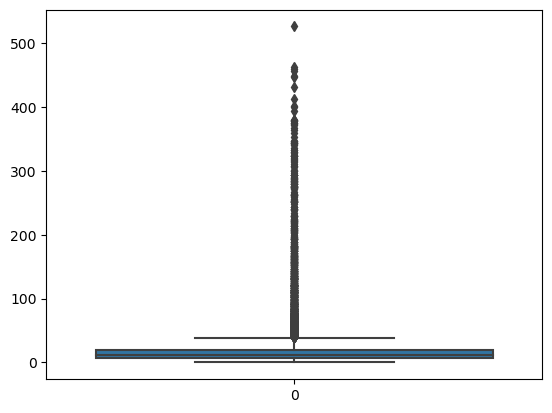

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(users_df["diferencia_dias"])
plt.show()

In [58]:
def discretizar_dias(x):
    if x > 100:
        return "+100"
    else:
        return "-100"

users_df["discretos_dias"] = users_df["diferencia_dias"].apply(discretizar_dias)

In [59]:
users_df["discretos_dias"].value_counts()

discretos_dias
-100    20747
+100      468
Name: count, dtype: int64

In [60]:
limite = 100
df_limit = users_df[users_df['diferencia_dias']<limite]

filtro1 = df_limit.target == 1 #me quedo con un dataset de morosos
filtro2 = df_limit.target == 0 #me quedo con un dataset de pagadores

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_17450/2100814544.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limit[filtro2]['diferencia_dias'], label="buen_pagador")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_17450/2100814544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

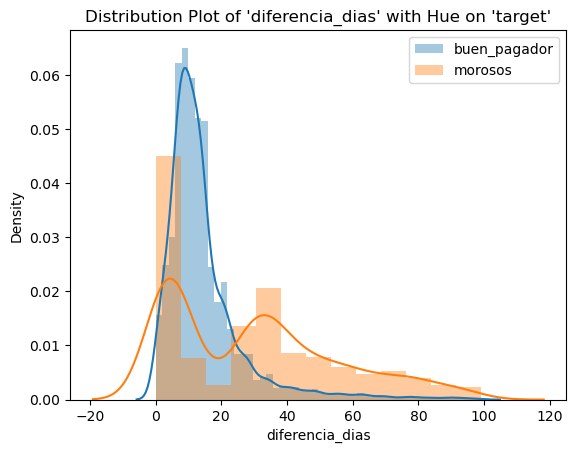

In [61]:
sns.distplot(df_limit[filtro2]['diferencia_dias'], label="buen_pagador")
sns.distplot(df_limit[filtro1]['diferencia_dias'], label="morosos")

plt.title("Distribution Plot of 'diferencia_dias' with Hue on 'target'")
plt.legend()
plt.show()


In [62]:
# a mas cantidad de sesiones --> mas va a aumentar la probabilidad de no pago
# puede ser que hay distancias entre pagador y no pagador. dsps espera un mes y piensa "che no le voy a pagar"
# cuando pasa mucho tiempo aumenta la proba de que no me vaya a pagar